In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\shoot\Downloads\modu-ds-4-credit-card-fraud-detection\train.csv")
test = pd.read_csv(r"C:\Users\shoot\Downloads\modu-ds-4-credit-card-fraud-detection\test.csv")

In [3]:
train.shape

(170883, 32)

In [4]:
test.shape  # train 데이터와 행의 갯수가 많이 차이 남 

(113923, 31)

In [5]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [7]:
train.info() # 문자열 데이터 0개 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [8]:
X_train = train.drop(columns=['Class', 'id'])
y_train = train['Class']
X_test = test.drop(columns=['id'])

In [9]:
train.shape

(170883, 32)

In [ ]:
train.shape

(113923, 31)

In [11]:
train.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [13]:
X_train.isnull().sum() # 결측값 0개 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

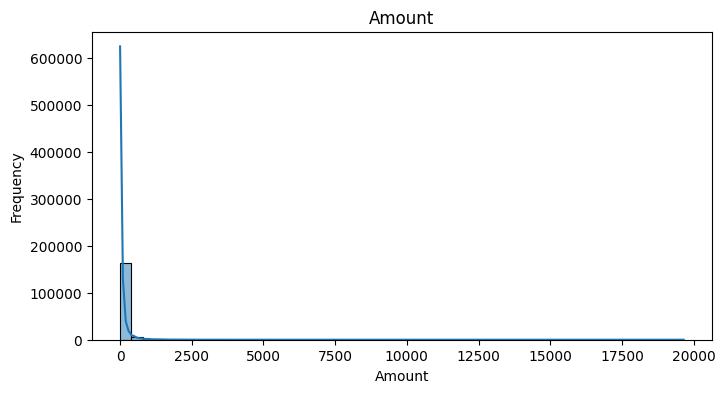

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(X_train['Amount'], bins=50, kde=True)
plt.title('Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

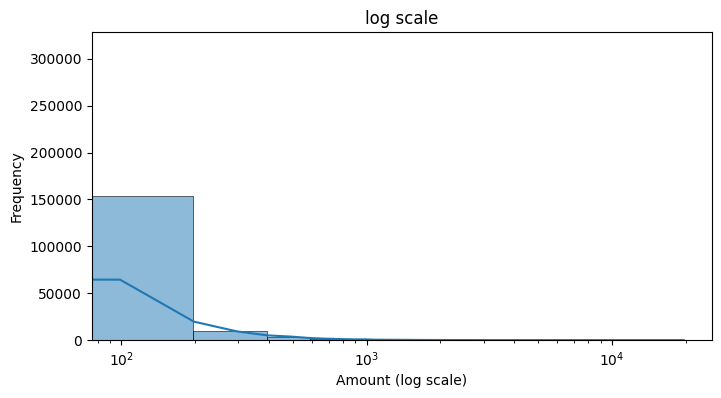

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(X_train['Amount'], bins=100, kde=True)
plt.xscale('log')  # ← 이게 핵심
plt.title('log scale')
plt.xlabel('Amount (log scale)')
plt.ylabel('Frequency')
plt.show()
# Right Skew확인, 로그변환의 근거 

In [16]:
X_train['Amount_log'] = np.log1p(X_train['Amount'])
X_test['Amount_log'] = np.log1p(X_test['Amount'])

### Time contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [17]:
print(X_train['Time'].min())
print(X_test['Time'].max())

0.0
172788.0


In [18]:
print(X_train['Time'].max()/60/60/24)

1.3934722222222222


In [19]:
X_train['Time_fe'] = X_train['Time'].apply(lambda x: x//60//60)
X_test['Time_fe'] = X_test['Time'].apply(lambda x: x//60//60)

In [20]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_log,Time_fe
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,5.014760,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1.305626,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,5.939276,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,4.824306,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,4.262539,0.0


<Axes: >

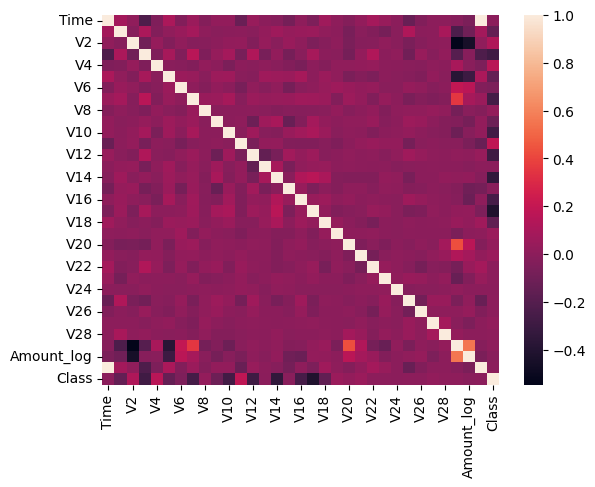

In [21]:
X_corr = X_train.copy()
X_corr['Class'] = y_train # X_corr에 Class피처 추가

corr = pd.DataFrame(
    np.zeros((X_corr.shape[1], X_corr.shape[1])),
    index = X_corr.columns,
    columns = X_corr.columns 
) # 엔덱스와 컬럼이 X_corr의 컬럼인 빈 껍데기인 데이터 프레임 생성

for c1 in X_corr.columns:
    for c2 in X_corr.columns:
        corr.loc[c1, c2] = X_corr[c1].corr(X_corr[c2])
# 빈 껍데기의 데이터 프레임을 같은 두 컬럼을 중첩 반복문을 통해 상관관계를 구하고 그 값을 loc으로 데이터 프레임에 차례대로 하나씩 채워줌

sns.heatmap(corr)

### 차원 축소를 하기에 앞서서 데이터셋의 설명을 보면 " PCA 변환을 거친 수치형 변수들만 포함하고 있습니다."라는 설명이 있습니다. 일반적으로 PCA는 스케일링(정규화)을 선행한 후 적용되기 때문에, 직접 확인해 본 것은 아니지만 이 데이터는 이미 스케일링이 완료된 상태라고 볼 수 있습니다

In [22]:
# from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE

# # 클러스터링 
# kmeans = KMeans(n_clusters=2, random_state=42)  # 클래스가 2진이기 때문에 군집수(n_clusters)를 2로 설정 
# clusters = kmeans.fit_transform(X_train)

# # 비선형 차원 축소
# model = TSNE(n_components=2, perplexity=30, random_state=42)  # 시각화 목적으로 차원(n_components)설정 n_components=2는 2차원
# tsne = model.fit_transform(X_train)

# # 시각화용 데이터 프레임 생성 
# fr = pd.DataFrame({
#     'tsne1': tsne[:, 0],
#     'tsne2': tsne[:, 1],
#     'cluster': kmeans.labels_
# })

# sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)

### 개별적으로 학습을 진행하면서 클러스터링과 비선형 차원 축소도 활용을 해보고 싶었지만 런타임이 너무 길어지는 관계로 그냥 적는 것으로 대체를 하였습니다.

In [24]:
corr_matrix = X_corr.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Amount_log,Time_fe,Class
Time,1.000000,0.077166,0.013977,-0.228347,-0.049952,0.109333,-0.037383,0.046769,-0.031123,0.020834,...,0.034757,-0.005505,-0.133389,-0.043511,-0.001424,-0.001472,-0.024556,-0.060977,0.999287,-0.007334
V1,0.077166,1.000000,-0.021880,0.110068,-0.032011,0.015610,0.040514,0.085593,0.009346,-0.011211,...,-0.076076,-0.010843,0.122427,-0.001827,-0.001740,0.097701,-0.233275,-0.102623,0.077976,-0.145423
V2,0.013977,-0.021880,1.000000,-0.093287,0.032669,-0.037409,0.011712,-0.020338,-0.017466,0.000430,...,0.010342,-0.010290,-0.066987,-0.024379,-0.001585,0.007350,-0.544872,-0.448637,0.013779,0.124537
V3,-0.228347,0.110068,-0.093287,1.000000,-0.049569,0.091800,-0.038392,0.157158,-0.045770,0.029284,...,-0.003174,0.012472,-0.093899,0.034901,-0.019727,0.017109,-0.197160,-0.017476,-0.228697,-0.281337
V4,-0.049952,-0.032011,0.032669,-0.049569,1.000000,-0.007984,-0.018764,-0.037685,0.017651,-0.001172,...,0.004230,-0.001969,-0.013585,-0.014510,0.004939,-0.004937,0.096242,-0.009830,-0.050168,0.159813
V5,0.109333,0.015610,-0.037409,0.091800,-0.007984,1.000000,0.051716,0.035170,-0.010608,0.056082,...,0.001834,-0.010979,-0.024340,-0.038392,0.018102,-0.008312,-0.377243,-0.302128,0.109710,-0.143884
V6,-0.037383,0.040514,0.011712,-0.038392,-0.018764,0.051716,1.000000,0.004352,-0.029656,0.019832,...,-0.011813,-0.008706,0.032506,0.012278,-0.021812,-0.004327,0.196993,0.163397,-0.037306,-0.053041
V7,0.046769,0.085593,-0.020338,0.157158,-0.037685,0.035170,0.004352,1.000000,0.042976,0.052248,...,0.028543,-0.000169,-0.066809,-0.026289,-0.049036,-0.027002,0.352928,0.090460,0.046725,-0.263719
V8,-0.031123,0.009346,-0.017466,-0.045770,0.017651,-0.010608,-0.029656,0.042976,1.000000,-0.013004,...,-0.036530,0.009306,0.015143,0.014576,0.030342,0.015088,-0.084012,-0.009292,-0.031296,0.026687
V9,0.020834,-0.011211,0.000430,0.029284,-0.001172,0.056082,0.019832,0.052248,-0.013004,1.000000,...,-0.023616,0.003203,0.053327,0.044162,-0.000080,-0.029340,-0.032619,-0.076248,0.022328,-0.114938


In [25]:
corr_with_class = X_corr.corr()['Class'].drop('Class')
low_corr = corr_with_class[abs(corr_with_class) < 0.01].index.tolist()  # 종속변수와 낮은 상관관계를 가진 피처 선별

In [ ]:
from xgboost import XGBClassifier  # XGB로 피처 중요도 계산

model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
importance = pd.Series(model.feature_importances_, index=X_train.columns)

In [ ]:
low_importance = importance.sort_values().head(10).index.tolist()
final_drop = list(set(low_corr) & set(low_importance))   # XGB로 계산한 피처 중요도에서 하위 10개와 피처와 종속변수의 상관관계가 0.01 미만인 피처들을 교집합 하여 최종적으로 드랍할 피처들을 구함

In [28]:
final_drop

['V13', 'V23', 'V24', 'V25']

In [29]:
X_train = X_train.drop(columns=final_drop)
X_test = X_test.drop(columns=final_drop)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 모델 선언
model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 학습
model.fit(X_train, y_train)

# AUC 평가
y_proba = model.predict_proba(X_valid)[:, 1]  # 클래스가 1일 확률만 뽑음
auc = roc_auc_score(y_valid, y_proba)
print(f"AUC: {auc:.4f}")

AUC: 0.9765


In [31]:
import optuna

# train/validation 나누기
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Optuna 목적 함수 정의
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 3.0),
        "random_state": 42,
        "use_label_encoder": False,
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict_proba(X_valid_split)[:, 1]
    return roc_auc_score(y_valid_split, y_pred)

# 최적화 시작
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# 결과 출력
print("Best AUC:", study.best_value)
print("Best Parameters:", study.best_trial.params)

[I 2025-05-13 22:32:09,959] A new study created in memory with name: no-name-a0f1adea-30f3-4833-b50b-c4648e0749fb
[I 2025-05-13 22:32:11,596] Trial 0 finished with value: 0.968747630289825 and parameters: {'n_estimators': 430, 'max_depth': 8, 'learning_rate': 0.05576533596837444, 'subsample': 0.9494452880443041, 'colsample_bytree': 0.6392996656047584, 'reg_alpha': 0.6295913075854489, 'reg_lambda': 0.1380542856881708}. Best is trial 0 with value: 0.968747630289825.
[I 2025-05-13 22:32:12,245] Trial 1 finished with value: 0.9599955007102812 and parameters: {'n_estimators': 133, 'max_depth': 7, 'learning_rate': 0.11868666716482411, 'subsample': 0.754292269980098, 'colsample_bytree': 0.8357292848795872, 'reg_alpha': 0.2487389491491161, 'reg_lambda': 1.7516676417824215}. Best is trial 0 with value: 0.968747630289825.
[I 2025-05-13 22:32:12,878] Trial 2 finished with value: 0.9180762755991891 and parameters: {'n_estimators': 164, 'max_depth': 4, 'learning_rate': 0.24126268280405935, 'subsamp

Best AUC: 0.9759806176665369
Best Parameters: {'n_estimators': 309, 'max_depth': 3, 'learning_rate': 0.014616669734612581, 'subsample': 0.7364653273329355, 'colsample_bytree': 0.9865697464104932, 'reg_alpha': 0.7997232062227932, 'reg_lambda': 2.1339483535970314}


In [32]:
final_model = XGBClassifier(
    n_estimators=309,
    max_depth=3,
    learning_rate=0.0146,
    subsample=0.7364,
    colsample_bytree=0.9866,
    reg_alpha=0.7997,
    reg_lambda=2.1339,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

final_model.fit(X_train, y_train)

y_valid_proba = final_model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_proba)
print(f"최종 튜닝 모델 AUC: {auc:.4f}")

최종 튜닝 모델 AUC: 0.9822


### VS code에서 작성한 코드를 캐글 노트북에 복사 붙여 넣기를 하여 제출을 하려 했으나 AUC score가 캐글 노트북에서 더 낮게 나왔습니다. 따라서 깃허브 링크로 제출하는 점 양해 부탁드립니다. 솔직하게 하루 안에 해당 프로젝트를 끝내라는 것은 좀 너무 무리가 아닌가라는 생각을 합니다. 또한 금요일 날에 현재 개별적으로 학습 중인 집값 예측 프로젝트가 계획이 되어 있던데 메인 퀘스트의 주기가 너무 짧다고 생각을 합니다. 랭커들의 코드를 하나씩 뜯어 보면서 그것을 왜 그렇게 썼는지 이해하고 제 스타일대로 재구성 하는 학습을 하고 있는 중인데 학습을 하면 할 수록 정말 공부를 많이 해야 하는 분야라는 것을 느낍니다. 다음 계획표도 보면 많이 빡빡한 것 같습니다. 애시당초 모든 것을 소화할 수 있을 것이라고는 생각하지는 않았지만 거의 씹을 틈도 없는 것 같습니다. 조금 답답한 마음에 이런 불평 글을 적게 된 것 같습니다. 누굴 탓하고 포기하고 싶다고 말하는 것이 아닙니다. 혹시라고 보시고 불편하셨다면 사과의 말씀드리겠습니다. 금일 프로젝트를 진행하면서 최대한 배웠던 내용들을 써먹어 보고 싶었습니다. 전처리를 하기 전에 통계 검정도 해보고 싶었지만 오늘 데이터 특성상 통계 검정을 사용하기는 어려웠습니다. 모델링 코드나 파라미터 튜닝 코드 또 어려운 코드들은 거의 제가 작성을 하지는 않았지만 피처의 이중 필터링 등과 같이 이런 방향성들은 거의 제가 정하고 갔습니다. 아쉬운 점이라면 비선형 압축과 클러스터링 또한 진행을 해보고 싶었지만 다른 데이터와 다르게 런타임이 너무 길어져서 하지 못했던 것이 아쉬웠습니다. 여전히 굉장히 많이 부족하다고 느낍니다. 또 거의 하루 종일 진행을 한 거 같은데 막상 스크롤을 하여 작업한 것을 보면 생각보다 많이 초라하다고 느낍니다. 